In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Args

In [2]:
EXP = "exp3"
PLATFORM = "IONTORRENT"#"ILLUMINA"

# Input

In [3]:
kma_fil = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_MHC_" + PLATFORM + "/mapping/kma-1t1/output/mapping.frag.gz"

# Output

In [4]:
clean_fil = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_MHC_" + PLATFORM + "/mapping/kma-1t1/output/mapping.clean.gz"

# Main

In [5]:
df = pd.read_csv(kma_fil, sep='\t', usecols = (1, 2, 3, 4, 5, 6), names = ('uncertainty', 'score', 't_alignment_start', 't_alignment_end', 'template_id', 'read_header'))

In [6]:
df

,uncertainty,score,t_alignment_start,t_alignment_end,template_id,read_header
0,15,45,88,145,A1064B288_bc25mer_21627 <unknown description>,HBBAF:02644:01966 BX:Z:TTAGGACCAACGATCT-1
1,15,44,88,144,A1064B288_bc25mer_21627 <unknown description>,HBBAF:00780:01765 BX:Z:TTAGGACCAACGATCT-1
2,5,98,0,114,A1064B288_bc25mer_21627 <unknown description>,HBBAF:03518:01259 BX:Z:GCTGCAGGTACCGCTG-1
3,5,101,0,129,A1064B288_bc25mer_21627 <unknown description>,HBBAF:03366:00950 BX:Z:GCTGCAGGTACCGCTG-1
4,5,92,0,105,A1064B288_bc25mer_21627 <unknown description>,HBBAF:03285:01256 BX:Z:GCTGCAGGTACCGCTG-1
5,5,94,0,116,A1064B288_bc25mer_21627 <unknown description>,HBBAF:03267:01443 BX:Z:GCTGCAGGTACCGCTG-1
6,5,96,0,115,A1064B288_bc25mer_21627 <unknown description>,HBBAF:03130:01575 BX:Z:GCTGCAGGTACCGCTG-1
7,5,98,0,114,A1064B288_bc25mer_21627 <unknown description>,HBBAF:02744:01396 BX:Z:GCTGCAGGTACCGCTG-1
8,5,98,0,133,A1064B288_bc25mer_21627 <unknown description>,HBBAF:02685:00249 BX:Z:GCTGCAGGTACCGCTG-1
9,5,100,0,113,A1064B288_bc25mer_21627 <unknown description>,HBBAF:02611:01617 BX:Z:GCTGCAGGTACCGCTG-1


In [90]:
df['query_id'], df['gem'] = df['read_header'].str.split(" ", n = 1).str
df.replace({"gem": r"^BX:Z:"}, {"gem": ""}, regex=True, inplace=True)
assert df.duplicated(['query_id']).sum() == 0

df['credible_alignment'] = np.where(df['uncertainty'] == 1, True, False)
df['alignment_length'] = df['t_alignment_end'] - df['t_alignment_start']
df['barcode'], df['sample'] = df.template_id.str.split(" ", n=1).str
df['template_id'] = df.template_id.str.split(" ", n=1,expand=True)[0] + "_sample"

In [92]:
df.to_csv(clean_fil, sep="\t", index=False)

# Statistics

## Uncertainty

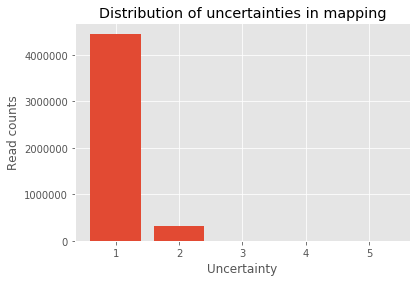

In [8]:
plt.bar(df.uncertainty.value_counts().index, df.uncertainty.value_counts().values)
plt.title("Distribution of uncertainties in mapping")
plt.xlabel('Uncertainty')
plt.ylabel('Read counts')
plt.show()

## Number of barcode annotated reads

In [9]:
tCD8 = sum(df.barcode.str.startswith("A4000"))
tMHC = sum(df.barcode.str.startswith("A10"))
tHASH = sum(df.barcode.str.startswith("HASH"))
tADT = sum(df.barcode.str.startswith("ADT"))

In [10]:
CD8 = sum(df[df.credible_alignment == True].barcode.str.startswith("A4000"))
MHC = sum(df[df.credible_alignment == True].barcode.str.startswith("A10"))
HASH = sum(df[df.credible_alignment == True].barcode.str.startswith("HASH"))
ADT = sum(df[df.credible_alignment == True].barcode.str.startswith("ADT"))

In [11]:
print("CD8", CD8)
print("MHC", MHC)
print("CD8", HASH)
print("MHC", ADT)

CD8 3561
MHC 15430
CD8 4295558
MHC 143278


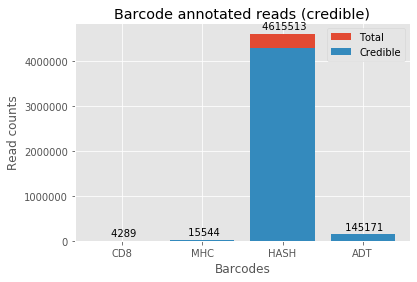

In [12]:
title = "Barcode annotated reads (credible)"
labels = ['CD8', 'MHC', 'HASH', 'ADT']
p1 = plt.bar(labels, [tCD8, tMHC, tHASH, tADT])
p2 = plt.bar(labels, [CD8, MHC, HASH, ADT])
plt.title(title)
#plt.ylim((tHASH + 10))
plt.ylabel('Read counts')
plt.xlabel('Barcodes')
plt.title(title)
for i, v in enumerate([tCD8, tMHC, tHASH, tADT]):
    plt.text(labels[i], v+100000, " "+str(v), ha='center')

plt.legend((p1[0], p2[0]), ('Total', 'Credible'))
plt.show()

## Distribution of barcode annotated reads

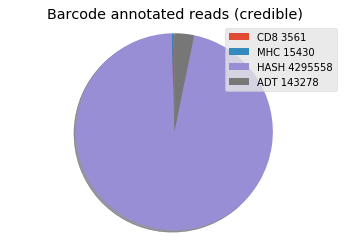

In [13]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
title = "Barcode annotated reads (credible)"
labels = ['CD8', 'MHC', 'HASH', 'ADT']
sizes = [CD8, MHC, HASH, ADT]

labels = [labels[i] + " " + str(sizes[i]) for i in range(4)]

patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(title)

#plt.savefig(FIG_DIR + "_".join(title.split()) + ".png") 
plt.show()

## Number of barcodes within each barcode design

In [14]:
df['barcode_design'] = np.where(df.barcode.str.contains("^A\d+B\d+"), "Amalie", "10x")

In [15]:
df['epitope'] = np.where(df.barcode.str.contains("A1064B288") | df.barcode.str.contains("ADT_5000"), "v9", None)
df['epitope'] = np.where(df.barcode.str.contains("A1065B288") | df.barcode.str.contains("ADT_5001"), "v13", df['epitope'])
df['epitope'] = np.where(df.barcode.str.contains("A1066B288") | df.barcode.str.contains("ADT_5002"), "CLYBL", df['epitope'])

In [57]:
df.groupby(['barcode_design','epitope']).size()

barcode_design  epitope
10x             CLYBL        5737
                v13          4153
                v9         135281
Amalie          CLYBL        1055
                v13         14247
                v9            242
dtype: int64

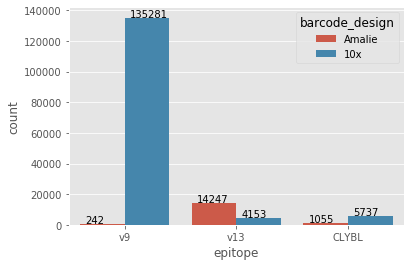

In [67]:
ax = sns.countplot(x="epitope", hue="barcode_design", data=df.dropna(subset=['epitope']))
for p in ax.patches:
        ax.annotate('%d' %p.get_height(), (p.get_x()+0.05, p.get_height()+500))

plt.show()

## Number of barcodes within each sample

In [45]:
df['sample_id'] = np.where(df.barcode.str.contains("A4000B288") | df.barcode.str.contains("HASH_5003"), "BC", None)
df['sample_id'] = np.where(df.barcode.str.contains("A4000B290") | df.barcode.str.contains("HASH_5004"), "Clone", df['sample'])

In [56]:
df.groupby(['barcode_design','sample_id']).size()

barcode_design  sample_id
10x             BC           3969296
                Clone         646217
Amalie          BC              4264
                Clone             25
dtype: int64

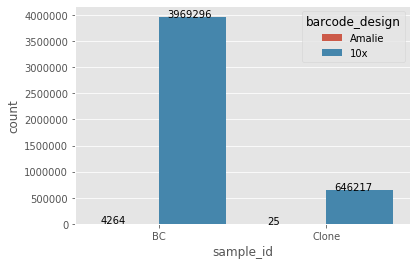

In [69]:
plt.figure()
ax = sns.countplot(x="sample_id", hue="barcode_design", data=df.dropna(subset=['sample_id']))
for p in ax.patches:
        ax.annotate('%d' %p.get_height(), (p.get_x()+0.05, p.get_height()+1000))
plt.show()